In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
input_data_file = "sort_data.txt"
df = pd.read_csv(os.path.join("..", "Data", input_data_file),sep='\t')
#df = pd.read_csv(os.path.join("..", "Data", input_data_file),sep='\t', nrows=1500000)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df

C:\Users\gleix\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,...,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,year,leie_code,leie
0,1205963402,M,I,ROCKVILLE,2.08521e+08,MD,US,Allergy/Immunology,Y,O,...,N,153.0,13.0,153.0,11.800000,25.000000,7.897516,2012,1128b4,On_List
1,1467447557,M,I,FLINT,4.85325e+08,MI,US,Family Practice,Y,O,...,N,93.0,65.0,93.0,129.454731,209.408602,97.705054,2017,1128a1,On_List
2,1952417610,M,I,HOUSTON,7.70813e+08,TX,US,Neurology,Y,O,...,N,36.0,35.0,36.0,40.992778,50.123611,25.856944,2014,1128a1,On_List
3,1467447557,M,I,FLINT,4.85325e+08,MI,US,Family Practice,Y,O,...,N,724.0,210.0,724.0,48.580000,150.000000,47.610000,2017,1128a1,On_List
4,1467447557,M,I,FLINT,4.85325e+08,MI,US,Family Practice,Y,O,...,N,11.0,11.0,11.0,25.000000,25.000000,6.985455,2017,1128a1,On_List
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56819222,1053396929,M,I,HACKENSACK,76011914,NJ,US,Diagnostic Radiology,Y,F,...,N,11.0,11.0,11.0,40.180000,75.000000,31.500000,2014,None,Not
56819223,1053396929,M,I,HACKENSACK,76011914,NJ,US,Diagnostic Radiology,Y,F,...,N,15.0,13.0,15.0,53.290000,160.000000,41.780000,2014,None,Not
56819224,1053396929,M,I,HACKENSACK,76011914,NJ,US,Diagnostic Radiology,Y,F,...,N,33.0,32.0,33.0,46.360000,151.000000,36.350000,2014,None,Not
56819225,1053396929,M,I,HACKENSACK,76011914,NJ,US,Diagnostic Radiology,Y,O,...,N,46.0,44.0,46.0,299.020000,525.000000,230.607391,2014,None,Not


In [3]:
df['nppes_provider_gender'] = df['nppes_provider_gender'].fillna('O')

In [4]:
df.columns

Index(['npi', 'nppes_provider_gender', 'nppes_entity_code',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt', 'year',
       'leie_code', 'leie'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56819227 entries, 0 to 56819226
Data columns (total 22 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   npi                               int64  
 1   nppes_provider_gender             object 
 2   nppes_entity_code                 object 
 3   nppes_provider_city               object 
 4   nppes_provider_zip                object 
 5   nppes_provider_state              object 
 6   nppes_provider_country            object 
 7   provider_type                     object 
 8   medicare_participation_indicator  object 
 9   place_of_service                  object 
 10  hcpcs_code                        object 
 11  hcpcs_description                 object 
 12  hcpcs_drug_indicator              object 
 13  line_srvc_cnt                     float64
 14  bene_unique_cnt                   float64
 15  bene_day_srvc_cnt                 float64
 16  average_Medicare_allowed_amt      

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['line_srvc_cnt', 'place_of_service', 'hcpcs_drug_indicator', 'nppes_entity_code', 'nppes_provider_gender',
                       'medicare_participation_indicator', 'leie']]
selected_features = selected_features.dropna()
selected_features

,line_srvc_cnt,place_of_service,hcpcs_drug_indicator,nppes_entity_code,nppes_provider_gender,medicare_participation_indicator,leie
0,153.0,O,N,I,M,Y,On_List
1,93.0,O,N,I,M,Y,On_List
2,36.0,O,N,I,M,Y,On_List
3,724.0,O,N,I,M,Y,On_List
4,11.0,O,N,I,M,Y,On_List
...,...,...,...,...,...,...,...
56819222,11.0,F,N,I,M,Y,Not
56819223,15.0,F,N,I,M,Y,Not
56819224,33.0,F,N,I,M,Y,Not
56819225,46.0,O,N,I,M,Y,Not


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
selected_features.info()

#output_data_file = "mike_look_test.txt"
#selected_features.to_csv(os.path.join("..", "Data", output_data_file), index= False, sep='\t')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56819221 entries, 0 to 56819226
Data columns (total 7 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   line_srvc_cnt                     float64
 1   place_of_service                  object 
 2   hcpcs_drug_indicator              object 
 3   nppes_entity_code                 object 
 4   nppes_provider_gender             object 
 5   medicare_participation_indicator  object 
 6   leie                              object 
dtypes: float64(1), object(6)
memory usage: 3.4+ GB


In [8]:
disposition = selected_features["leie"]
plot_df = selected_features[["leie"]]
disposition_names = ["Not", "On_List"]
selected_features = selected_features.drop("leie", axis=1)
feature_names = selected_features.columns
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56819221 entries, 0 to 56819226
Data columns (total 6 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   line_srvc_cnt                     float64
 1   place_of_service                  object 
 2   hcpcs_drug_indicator              object 
 3   nppes_entity_code                 object 
 4   nppes_provider_gender             object 
 5   medicare_participation_indicator  object 
dtypes: float64(1), object(5)
memory usage: 3.0+ GB


In [9]:
mike_df2 = disposition
mike3 = mike_df2.to_frame()
mike3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56819221 entries, 0 to 56819226
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   leie    object
dtypes: object(1)
memory usage: 867.0+ MB


In [10]:
mike3.leie.value_counts()

Not        56758899
On_List       60322
Name: leie, dtype: int64

In [11]:
data = pd.get_dummies(selected_features)
data

,line_srvc_cnt,place_of_service_F,place_of_service_O,hcpcs_drug_indicator_N,hcpcs_drug_indicator_Y,nppes_entity_code_I,nppes_entity_code_O,nppes_provider_gender_F,nppes_provider_gender_M,nppes_provider_gender_O,medicare_participation_indicator_N,medicare_participation_indicator_Y
0,153.0,0,1,1,0,1,0,0,1,0,0,1
1,93.0,0,1,1,0,1,0,0,1,0,0,1
2,36.0,0,1,1,0,1,0,0,1,0,0,1
3,724.0,0,1,1,0,1,0,0,1,0,0,1
4,11.0,0,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56819222,11.0,1,0,1,0,1,0,0,1,0,0,1
56819223,15.0,1,0,1,0,1,0,0,1,0,0,1
56819224,33.0,1,0,1,0,1,0,0,1,0,0,1
56819225,46.0,0,1,1,0,1,0,0,1,0,0,1


In [12]:
data = data.drop(['nppes_entity_code_O', 'medicare_participation_indicator_Y', 'place_of_service_O', 'hcpcs_drug_indicator_Y'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56819221 entries, 0 to 56819226
Data columns (total 8 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   line_srvc_cnt                       float64
 1   place_of_service_F                  uint8  
 2   hcpcs_drug_indicator_N              uint8  
 3   nppes_entity_code_I                 uint8  
 4   nppes_provider_gender_F             uint8  
 5   nppes_provider_gender_M             uint8  
 6   nppes_provider_gender_O             uint8  
 7   medicare_participation_indicator_N  uint8  
dtypes: float64(1), uint8(7)
memory usage: 1.2 GB


In [13]:

plot_df['leie_num'] = np.where(plot_df['leie'] == "Not", 0, 1)
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56819221 entries, 0 to 56819226
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   leie      object
 1   leie_num  int32 
dtypes: int32(1), object(1)
memory usage: 1.1+ GB


C:\Users\gleix\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56819221 entries, 0 to 56819226
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   leie      object
 1   leie_num  int32 
dtypes: int32(1), object(1)
memory usage: 1.1+ GB


In [15]:
plot_df

,leie,leie_num
0,On_List,1
1,On_List,1
2,On_List,1
3,On_List,1
4,On_List,1
...,...,...
56819222,Not,0
56819223,Not,0
56819224,Not,0
56819225,Not,0


In [16]:
x1 = data[['line_srvc_cnt']].values
y1 = plot_df[['leie_num']].values


In [17]:
x1

array([[153.],
       [ 93.],
       [ 36.],
       ...,
       [ 33.],
       [ 46.],
       [ 49.]])

In [18]:
y1

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

No handles with labels found to put in legend.


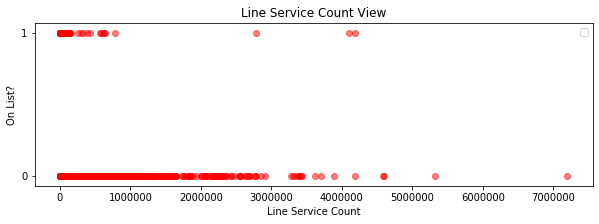

In [19]:
plt.figure(figsize=(10,3))
plt.scatter(x1, y1, color='red', alpha=0.5)
#plt.scatter(x1, y1, color='red', alpha=0.5, label='line_serv')
#plt.scatter(data[:, 0], plot_df[:, 1], color='red', alpha=0.5,label='0')
#plt.scatter(data[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.title("Line Service Count View")
plt.ylabel('On List?')
plt.xlabel('Line Service Count')
plt.yticks([0, 1])
plt.legend()
plt.show()